<a href="https://colab.research.google.com/github/ParadoxcodeXD/vision/blob/main/dataproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.1.4 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Playstore_final.csv', on_bad_lines = 'skip')

<ipython-input-3-88cd12c5a16c>:1: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Playstore_final.csv', on_bad_lines = 'skip')


In [4]:
df.head() # 타겟 변수를 Rating으로 진행

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,...,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.2.3
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,...,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,...,True,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6


In [5]:
df = df.dropna()

## 5.1.5 ID 변수 설정

In [6]:
df['App Id'].dtypes

dtype('O')

In [7]:
df['App Id'].isnull().sum()  # ID 변수인 id 값의 결측값 확인

0

In [8]:
# ID 변수인 id 값의 중복 여부를 체크하기 위해 유일한(unique) 값의 개수 체크 

n = len(pd.unique(df['App Id']))   # pd.unique는 유일한 변수값을 출력하고 len은 값의 개수를 카운트  
print(n)

101234


## 5.1.7 타겟변수 생성

In [9]:
df['Rating'].dtype

dtype('float64')

In [10]:
df['Rating'].isnull().sum()

0

In [11]:
df['Rating'].value_counts(dropna=False)

4.000000    1448
5.000000    1441
4.500000     840
4.200000     703
4.333334     658
            ... 
2.197183       1
3.809836       1
3.901288       1
3.913344       1
3.981408       1
Name: Rating, Length: 37345, dtype: int64

In [12]:
df['Rating'].value_counts(dropna=False, normalize=True)

4.000000    0.013742
5.000000    0.013675
4.500000    0.007972
4.200000    0.006672
4.333334    0.006245
              ...   
2.197183    0.000009
3.809836    0.000009
3.901288    0.000009
3.913344    0.000009
3.981408    0.000009
Name: Rating, Length: 37345, dtype: float64

In [13]:
df['Rating'].median()

4.2

In [14]:
df.loc[df['Rating'] >= 4.2, "Rating_b"]=1
df.loc[df['Rating'] < 4.2, "Rating_b"]=0
df['Rating_b'].value_counts(dropna=False)

1.0    52845
0.0    52527
Name: Rating_b, dtype: int64

## 5.1.7 기타 변수 데이터 처리

In [15]:
cols = ['Minimum Installs','Reviews'] # 구간 변수를 cols에 저장
df[cols].dtypes

Minimum Installs    float64
Reviews             float64
dtype: object

In [16]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df[cols].describe()

,Minimum Installs,Reviews
count,105372.00,105372.00
mean,1655931.02,12405.23
std,31156977.12,258328.96
min,0.00,0.00
25%,5000.00,20.00
50%,50000.00,142.00
75%,500000.00,1295.00
max,5000000000.00,39985223.00


In [45]:
df['Reviews'].median()

142.0

In [85]:
c= df['Reviews']>142
df[c].head(3)

,App Name,App Id,category,Rating,Rating Count,Installs,Minimum Installs,free,Price,Currency,...,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version,Rating_b
10,Early Learning App - Kids Piano & Puzzles,education.kids.learning,Education,4.27,846.00,"500,000+",500000.00,True,0.00,USD,...,True,False,"Kids Piano, Music & ABC Kids Puzzle Games for ...",502.00,4.1 and up,Early Learn,CA,7415446147207133184.00,2.7,1.00
11,Early Learning App For Kids,earlylearn.kidslearningworld,Education,4.38,7214.00,"1,000,000+",1000000.00,True,0.00,USD,...,False,False,"Kids Learning Games for preschoolers, kinderga...",1624.00,5.0 and up,Early Learn,CA,7415446147207133184.00,5.8,1.00
48,Kids Learning Box: Preschool,com.kidsappbox.kidslearninggame,Educational,4.38,3967.00,"1,000,000+",1000000.00,True,0.00,USD,...,True,False,Kids learning games for Preschool and Kinderga...,1001.00,4.1 and up,KidsAppBox,"3505 El Camino Real, Palo Alto, CA 94306",8840924357018376192.00,1.9,1.00


In [86]:
len(df[c])

52634

In [87]:
df1=df[c]
df1.shape

(52634, 30)

In [88]:
# 변수명을 소문자로 시작하게 변경
df1 = df1.rename(columns={'Free' : 'free'})
df1 = df1.rename(columns={'Category' : 'category'})
df1 = df1.rename(columns={'Ad Supported' : 'ad supported'})

In [89]:
# 범주형 변수를 cols1에 저장.
cols1 = ['free', 'category', 'ad supported']
df1 = df[cols1] 
df1[cols1].isnull().sum()

free            0
category        0
ad supported    0
dtype: int64

In [90]:
df1[cols1].dtypes

free            object
category        object
ad supported    object
dtype: object

## 5.1.8 결측값 50% 초과 변수 제거

In [53]:
df1.isna().any()[lambda x: x]

Series([], dtype: bool)

## 5.1.9 요약통계 및 도수분포표 점검

In [97]:
cols = ['Minimum Installs','Reviews'] # 구간 변수를 cols에 저장 
df[cols].describe()

,Minimum Installs,Reviews
count,105372.00,105372.00
mean,1655931.02,12405.23
std,31156977.12,258328.96
min,0.00,0.00
25%,5000.00,20.00
50%,50000.00,142.00
75%,500000.00,1295.00
max,5000000000.00,39985223.00


In [98]:
col_log = df[cols].transform(lambda x: np.log(x+1))  

In [99]:
col_log.skew()

Minimum Installs   0.11
Reviews            0.48
dtype: float64

In [100]:
col_log.kurtosis()

Minimum Installs   -0.41
Reviews            -0.36
dtype: float64

## 5.1.10 이상값 제거

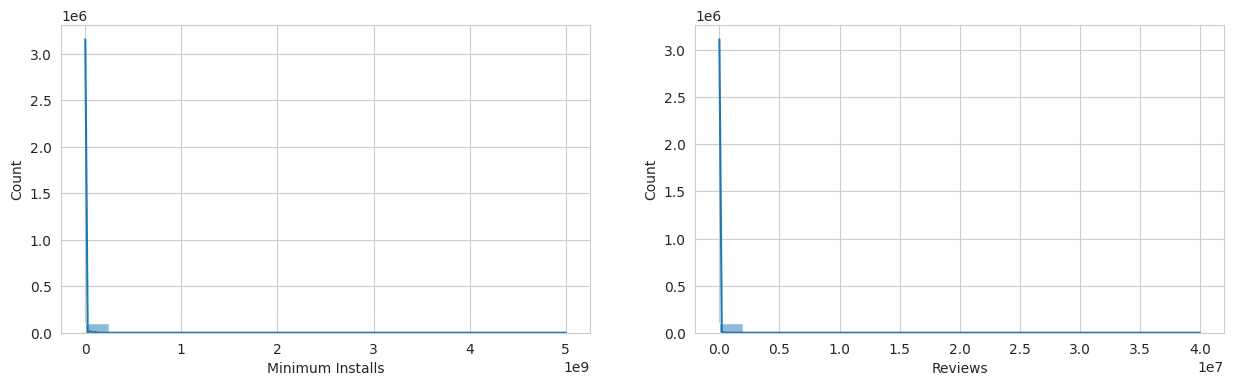

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="Minimum Installs", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="Reviews", kde=True, bins=20);
plt.show(); 

<Axes: xlabel='Reviews'>

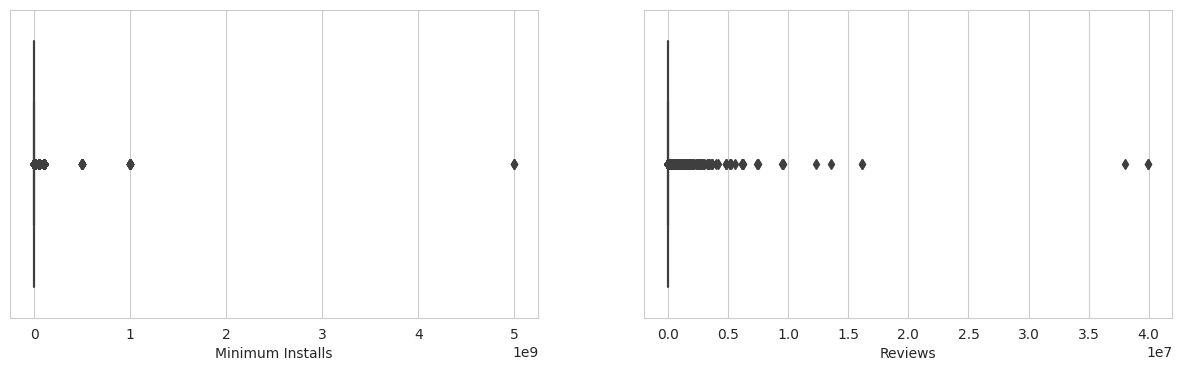

In [102]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'Minimum Installs', data = df) 
sns.boxplot(ax=axes[1], x = 'Reviews', data = df) 

In [103]:
Q1 = df[['Minimum Installs','Reviews']].quantile(0.25)
Q3 = df[['Minimum Installs','Reviews']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Minimum Installs   495000.00
Reviews              1275.00
dtype: float64


In [104]:
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

Minimum Installs   -1480000.00
Reviews               -3805.00
dtype: float64


In [105]:
print(Upper)

Minimum Installs   1985000.00
Reviews               5120.00
dtype: float64


In [106]:
df['Minimum Installs'].value_counts(dropna=False)

10000.00         20575
100000.00        20189
1000.00          13668
1000000.00       12832
50000.00          9519
5000.00           7886
500000.00         7563
10000000.00       3641
5000000.00        3382
500.00            2679
100.00            2130
50000000.00        546
100000000.00       325
50.00              234
10.00              150
500000000.00        18
1000000000.00       18
0.00                11
5000000000.00        3
1.00                 2
5.00                 1
Name: Minimum Installs, dtype: int64

In [107]:
df['Minimum Installs'].value_counts(dropna=False)

10000.00         20575
100000.00        20189
1000.00          13668
1000000.00       12832
50000.00          9519
5000.00           7886
500000.00         7563
10000000.00       3641
5000000.00        3382
500.00            2679
100.00            2130
50000000.00        546
100000000.00       325
50.00              234
10.00              150
500000000.00        18
1000000000.00       18
0.00                11
5000000000.00        3
1.00                 2
5.00                 1
Name: Minimum Installs, dtype: int64

In [108]:
c1 = df['Minimum Installs'] <= 3700000
c2 = df['Reviews'] <= 22204
df2 = df[c1 & c2]
df2.shape

(96404, 30)

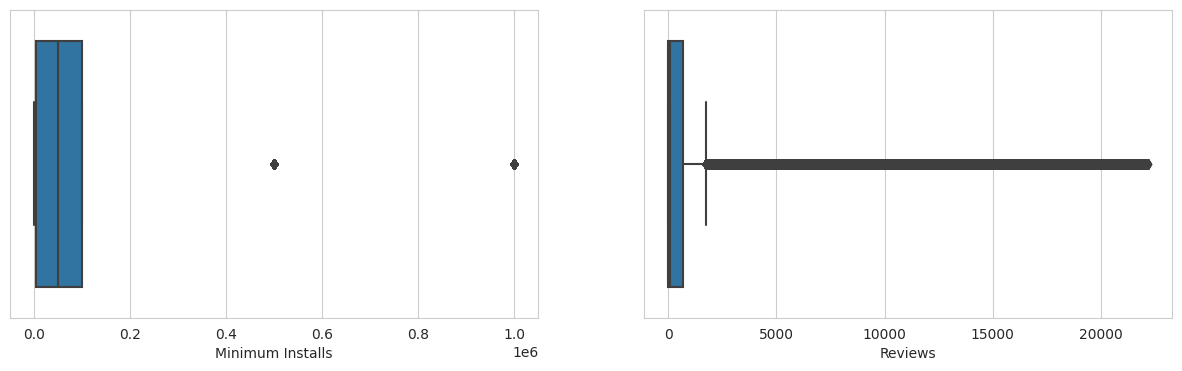

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'Minimum Installs', data = df2) 
sns.boxplot(ax=axes[1], x = 'Reviews', data = df2) ;

# 5.1.11 상관관계 검토

In [110]:
cols = ['Minimum Installs','Reviews'] # 구간 변수를 cols에 저장
round(df2[cols].corr(), 2)       

,Minimum Installs,Reviews
Minimum Installs,1.00,0.67
Reviews,0.67,1.00


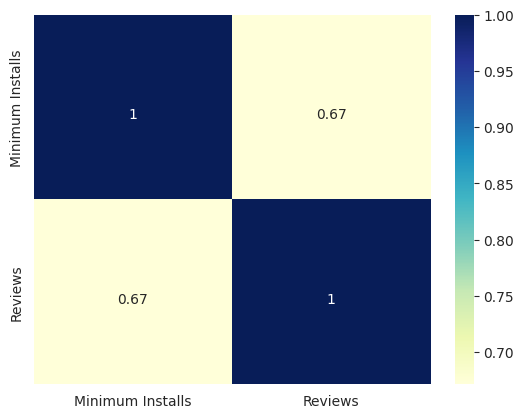

In [111]:
# 추가 코딩
import seaborn as sns

corr = df2[cols].corr()  
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu");

In [112]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/project roadmap/dataset.csv',index=False)

## 5.1.13 t-검정

In [113]:
from scipy import stats

data_1 = df2[df2['Rating_b'] == 1]['Reviews']
data_0 = df2[df2['Rating_b'] == 0]['Reviews']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05 

Ttest_indResult(statistic=29.130515588288894, pvalue=9.483352456336635e-186)